In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-16-2020.csv'
dpdf = pd.read_csv(url)

In [4]:
dpdf.tail()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
3037,NaN,NaN,NaN,West Bank and Gaza,2020-04-16 23:30:31,31.952200,35.233200,374,2,63,309,West Bank and Gaza
3038,NaN,NaN,NaN,Western Sahara,2020-04-16 23:30:31,24.215500,-12.885800,6,0,0,6,Western Sahara
3039,NaN,NaN,NaN,Yemen,2020-04-16 23:30:31,15.552727,48.516388,1,0,0,1,Yemen
3040,NaN,NaN,NaN,Zambia,2020-04-16 23:30:31,-13.133897,27.849332,48,2,30,16,Zambia
3041,NaN,NaN,NaN,Zimbabwe,2020-04-16 23:30:31,-19.015438,29.154857,23,3,1,19,Zimbabwe


In [5]:
country = 'US'
state = 'Minnesota'
county = 'Rice'

In [6]:
country_df = dpdf.loc[(dpdf['Country_Region'] == country)]
#country_df.head()

In [7]:
country_sum = pd.DataFrame([sum(country_df['Confirmed']),sum(country_df['Deaths']),sum(country_df['Recovered'])],
                          index = ["Confirmed","Deaths","Recovered"])
country_sum
                            

,0
Confirmed,667801
Deaths,32916
Recovered,54703


In [8]:
#country_sum.plot(kind='bar', figsize = (5,5))


In [9]:
state_df = country_df.loc[(country_df['Province_State'] == state) ]
#county_df = country_df.loc[(country_df['Province_State'] == state) & (country_df['Admin2'] == county)]

In [27]:
state_pdf = state_df[['Confirmed','Deaths','Recovered']]
state_pdf = state_pdf.set_index(state_df['Admin2'])
#state_pdf['Confirmed'].sum()
state_pdf

,Confirmed,Deaths,Recovered
Admin2,,,
Anoka,76,0,0
Becker,1,0,0
Beltrami,5,0,0
Benton,1,0,0
Big Stone,1,0,0
Blue Earth,23,0,0
Brown,7,1,0
Carlton,27,0,0
Carver,14,0,0


In [11]:
#state_pdf.plot(kind='bar',figsize=(17,6))
#plt.xticks(rotation=45)
#plt.show()

In [12]:
# time series
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
ustsdf = pd.read_csv(url)
len(ustsdf)

3256

<IPython.core.display.Javascript object>


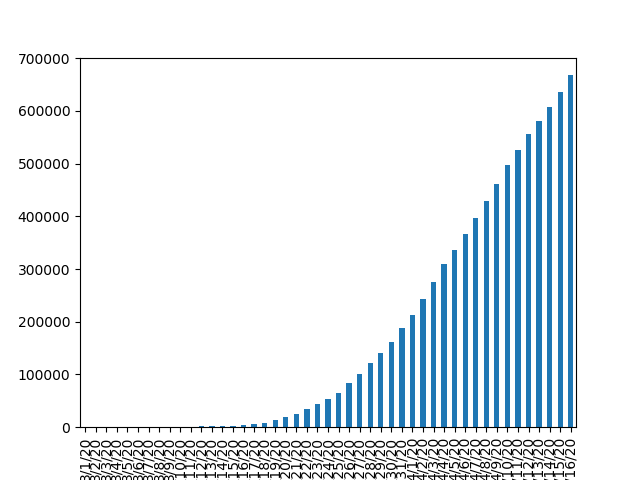

In [13]:
totals=ustsdf.iloc[:,50:].sum(axis=0,skipna=True)
test = ustsdf.iloc[:,75]
totals.plot(kind='bar')

In [14]:
state1 = 'California'
state2 = 'New York'
state3 = 'Minnesota'
state4 = 'Wisconsin'

firstustsdf = ustsdf.loc[ustsdf['Province_State']==state1]
secondustsdf = ustsdf.loc[ustsdf['Province_State']==state2]
thirdustsdf = ustsdf.loc[ustsdf['Province_State']==state3]
fourthustsdf = ustsdf.loc[ustsdf['Province_State']==state4]

firsttotals = firstustsdf.iloc[:,50:].sum(axis=0,skipna=True)
secondtotals = secondustsdf.iloc[:,50:].sum(axis=0,skipna=True)
thirdtotals = thirdustsdf.iloc[:,50:].sum(axis=0,skipna=True)
fourthtotals = fourthustsdf.iloc[:,50:].sum(axis=0,skipna=True)

ylim = max([max(firsttotals),max(secondtotals),max(thirdtotals),max(fourthtotals)])

<IPython.core.display.Javascript object>


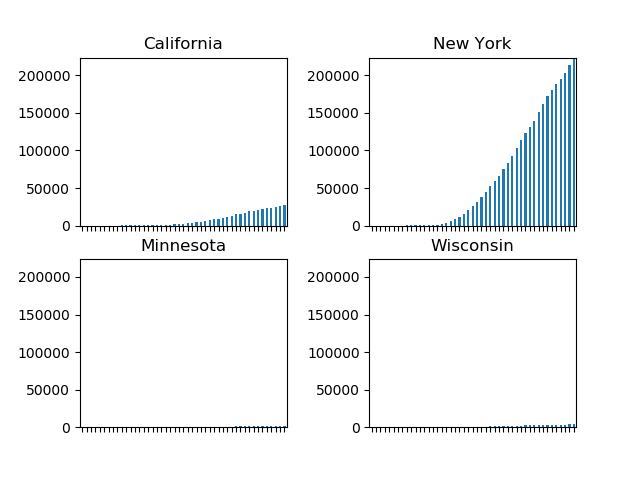

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
firsttotals.plot(kind='bar',ylim=[0,ylim],ax=axes[0,0])
secondtotals.plot(kind='bar',ylim=[0,ylim],ax=axes[0,1])
thirdtotals.plot(kind='bar',ylim=[0,ylim],ax=axes[1,0])
fourthtotals.plot(kind='bar',ylim=[0,ylim],ax=axes[1,1])
axes[0,0].set_title(state1)
axes[0,1].set_title(state2)
axes[1,0].set_title(state3)
axes[1,1].set_title(state4)
axes[0,0].set_xticklabels([])
axes[0,1].set_xticklabels([])
axes[1,0].set_xticklabels([])
axes[1,1].set_xticklabels([])
plt.subplots_adjust(wspace=.4)


In [16]:
states = [state1,state2,state3,state4]

onedf = pd.DataFrame({state1: firsttotals,
                     state2: secondtotals,
                     state3: thirdtotals,
                     state4: fourthtotals})
    

diffdf = onedf.diff().iloc[1:,:]
diffdf['date'] = diffdf.index
diffdf.head()


,California,New York,Minnesota,Wisconsin,date
3/2/20,9.0,1.0,0.0,0.0,3/2/20
3/3/20,4.0,1.0,0.0,0.0,3/3/20
3/4/20,10.0,9.0,0.0,0.0,3/4/20
3/5/20,16.0,12.0,0.0,0.0,3/5/20
3/6/20,8.0,8.0,1.0,0.0,3/6/20


In [17]:
diffdf.columns[3]

'Wisconsin'

<IPython.core.display.Javascript object>


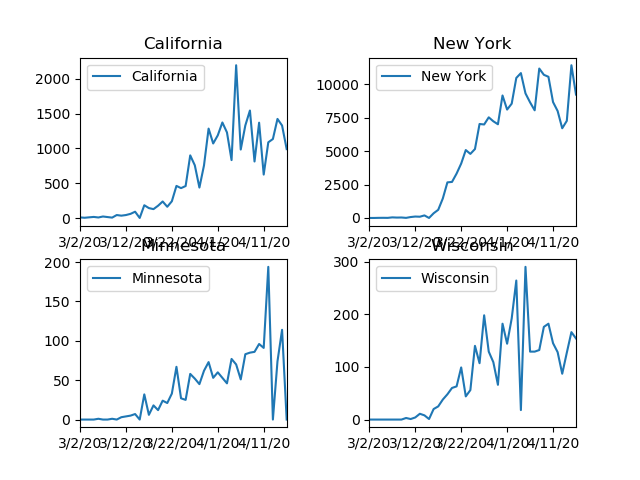

In [21]:
names = diffdf.columns
fig, axes = plt.subplots(nrows=2, ncols=2)
diffdf.plot(x = 'date',y=names[0],ax=axes[0,0])
diffdf.plot(x = 'date',y=names[1],ax=axes[0,1])
diffdf.plot(x = 'date',y=names[2],ax=axes[1,0])
diffdf.plot(x = 'date',y=names[3],ax=axes[1,1])

idx = -1
for i in range(2):
    for j in range(2):
        idx += 1
        axes[i,j].set_title(names[idx])
        axes[i,j].set_xticklabels([])
        axes[i,j].set_xlabel("")

plt.subplots_adjust(wspace=.4)

In [19]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
global_tsdf = pd.read_csv(url)
cantsdf = global_tsdf.loc[global_tsdf['Country/Region']=='Canada']
cantsdf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
35,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,1373,1373,1423,1451,1567,1567,1732,1870,1870,1996
36,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,1266,1291,1336,1370,1445,1445,1490,1490,1517,1561
37,Grand Princess,Canada,37.6489,-122.6655,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
38,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,217,217,221,230,243,242,246,246,246,250
39,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,105,105,108,112,112,114,116,116,117,117


<IPython.core.display.Javascript object>


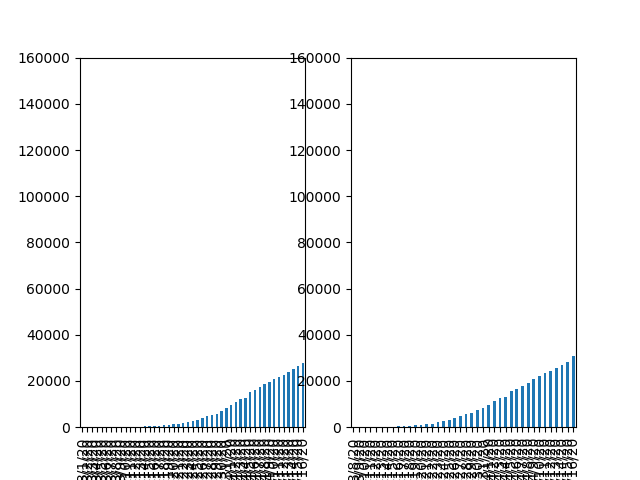

In [23]:
cantotals=cantsdf.iloc[:,50:].sum(axis=0,skipna=True)
fig, axes = plt.subplots(nrows=1, ncols=2)
firsttotals.plot(kind='bar',ylim=[0,160000],ax=axes[0])
cantotals.plot(kind='bar',ylim=[0,160000],ax=axes[1])